<a href="https://colab.research.google.com/github/Balavignesh-25/Resume-Screening-ML/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re


In [4]:
from google.colab import files

# Upload CSV File
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("AI_Resume_Screening.csv")

# Display first 5 rows
df.head()


Saving AI_Resume_Screening.csv to AI_Resume_Screening.csv


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [5]:
# Rename column to avoid confusion
df.rename(columns={'Experience (Years)': 'Experience'}, inplace=True)

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning to relevant columns
df['Skills'] = df['Skills'].apply(clean_text)
df['Experience'] = df['Experience'].apply(clean_text)

# Combine Skills & Experience into a single text column
df['Resume_Text'] = df['Skills'] + ' ' + df['Experience']

# Display the cleaned data
df.head()


,Resume_ID,Name,Skills,Experience,Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Resume_Text
0,1,Ashley Ali,tensorflow nlp pytorch,10,B.Sc,NaN,AI Researcher,Hire,104895,8,100,tensorflow nlp pytorch 10
1,2,Wesley Roman,deep learning machine learning python sql,10,MBA,Google ML,Data Scientist,Hire,113002,1,100,deep learning machine learning python sql 10
2,3,Corey Sanchez,ethical hacking cybersecurity linux,1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70,ethical hacking cybersecurity linux 1
3,4,Elizabeth Carney,python pytorch tensorflow,7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95,python pytorch tensorflow 7
4,5,Julie Hill,sql react java,4,PhD,NaN,Software Engineer,Hire,87441,9,100,sql react java 4


In [6]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the resume text
tfidf_matrix = tfidf.fit_transform(df['Resume_Text'])

# Check the shape of the matrix (number of resumes, number of features)
tfidf_matrix.shape


(1000, 16)

Enter the Job Description: machine learning developer

Top 10 Most Relevant Candidates:
                      Name                   Skills Experience  Similarity
930           Mark Sanford  python machine learning          2     0.87731
76           Timothy Kirby  python machine learning          0     0.87731
722         Jennifer Moran  python machine learning          8     0.87731
43          Denise Ramirez  machine learning python          1     0.87731
47   Christopher Stevenson  python machine learning          8     0.87731
575          James Johnson  python machine learning          5     0.87731
147          Joshua Hughes  python machine learning          8     0.87731
169            Ruth Prince  python machine learning          7     0.87731
348         Ashley Gardner  machine learning python          1     0.87731
507              Eric Bush  machine learning python          5     0.87731


<ipython-input-14-691f6f3e0568>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similarity', y='Name', data=top_10, palette='Blues_r')


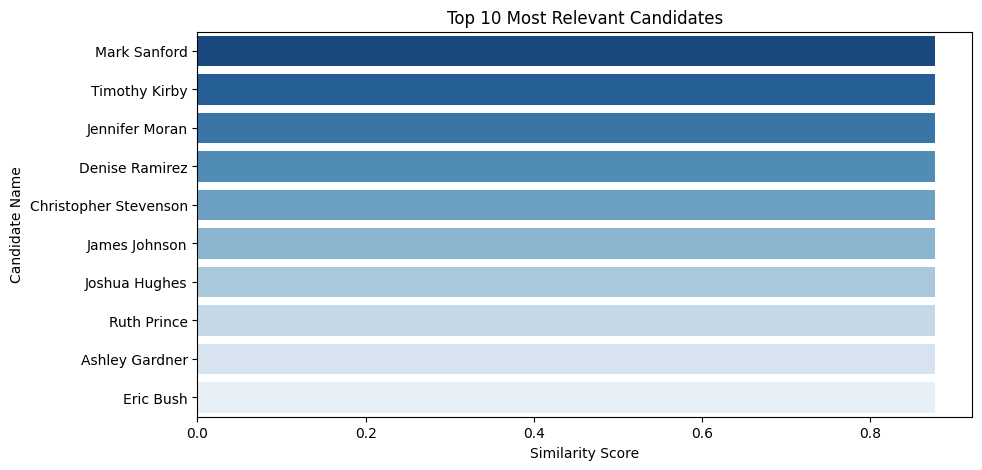

In [14]:
# Function to rank resumes based on job description
def rank_resumes():
    job_desc = input("Enter the Job Description: ")  # User enters job description
    job_desc_clean = clean_text(job_desc)  # Clean job description
    job_vec = tfidf.transform([job_desc_clean])  # Convert to TF-IDF vector

    similarity_scores = cosine_similarity(job_vec, tfidf_matrix)  # Compute similarity

    df['Similarity'] = similarity_scores[0]  # Add scores to dataframe

    df_sorted = df.sort_values(by='Similarity', ascending=False)  # Sort by similarity

    # Display top 10 ranked resumes
    print("\nTop 10 Most Relevant Candidates:")
    print(df_sorted[['Name', 'Skills', 'Experience', 'Similarity']].head(10))

    return df_sorted  # Return the sorted dataframe

# Call the function to enter a job description and rank resumes
df_sorted = rank_resumes()

# Select Top 10 Candidates for Plotting
top_10 = df_sorted[['Name', 'Similarity']].head(10)

# Plot the ranked candidates
plt.figure(figsize=(10,5))
sns.barplot(x='Similarity', y='Name', data=top_10, palette='Blues_r')

plt.xlabel("Similarity Score")
plt.ylabel("Candidate Name")
plt.title("Top 10 Most Relevant Candidates")
plt.show()
